<h1 style="text-align: center;"> Estadística </h1>
<h1 style="text-align: right; font-size: 24px; margin-right: 10px;"> </h1>

In [2]:
import pandas as pd
import numpy as np
import math
from collections import Counter
from scipy.stats import gmean # Para sacar la media geometrica
from scipy.stats import describe # Para sacar algunos datos descriptivos
from scipy.stats import skew # Para sacar la asimetria 
from scipy.stats import kurtosis # Para sacar la curtosis
from scipy.stats import kstest # Para sacar la prueba de Kolmogorov-Smirnov
#from scipy.stats import norm # Para tener el objeto de una distribucion normal
import scipy.stats
import sklearn.preprocessing
import sklearn.utils
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.stats.diagnostic import lilliefors

## Ejercicio 1. Cráneos egipcios

In [3]:
df = pd.read_excel("datosejercicioevaluacionanchuras.xlsx")

tempr = df[df["Época histórica"]==1]
tempr = tempr["Anchura del cráneo"]
tempr_arr = np.array(tempr)

tard = df[df["Época histórica"]==2]
tard = tard["Anchura del cráneo"]
tard_arr = np.array(tard)


In [4]:
registros, columnas_df = df.shape
registros, columnas_df

(60, 2)

### a.1. Obtener con Python las diferentes medidas de centralización y dispersión, asimetría y curtosis estudiadas. 

En los siguientes ejercicios, la mayoría de lo que se pide está impementado en python como funciones o métodos en alguna librería, es por ello que además de usar estas funciones he decidido realizar las cuentas a manos. Esto es para que yo aprenda mejor estos conceptos y es únicamente informació rebundante.

Las medidas estudiadas son:
* Medidas de posisción central
    * Media
        * Media aritmetica
        * Media geometrica
    * Mediana 
    * Moda
* Medidas de posición no centrales
    * Cuartiles
    * Deciles 
    * Percentiles
* Medias de dispersión 
    * Rango
    * Varianza
    * Desviación típica
    * Coeficiente de variación de Pearson
* Medidas de forma 
    * Asimetría 
    * Curtosis


Empezaré usando las funciones integradas en las diferentes librerias de python.

In [5]:
print(len(tempr))

30


In [6]:
# Medidas de posición central
## Media aritmetica
media_tempr = tempr.mean()
media_tard = tard.mean()

## Media geometrica 
mgeo_tempr = gmean(tempr)
mgeo_tard = gmean(tard)

## Mediana
mediana_tempr = tempr.median()
mediana_tard = tard.median()

## Moda
moda_tempr = tempr.mode().iloc[0]
moda_tard = tard.mode().iloc[0]

# Medidas de posicion no central
## Cuarrtiles
cuartil_25_tempr = tempr.quantile(0.25)
cuartil_25_tard = tard.quantile(0.25)
cuartil_75_tempr = tempr.quantile(0.75)
cuartil_75_tard = tard.quantile(0.75)

## Deciles
decil_10_tempr = tempr.quantile(0.1)
decil_10_tard = tard.quantile(0.1)

## Percentiles
percentil_1_tempr = tempr.quantile(0.01)
percentil_1_tard = tard.quantile(0.01)

# Medidas de dispersion
stats_tempr = describe(tempr)
stats_tard = describe(tard)

## Rango
rango_tempr = stats_tempr.minmax[1] - stats_tempr.minmax[0]
rango_tard = stats_tard.minmax[1] - stats_tard.minmax[0]

## Varianza
### Usando scipy
var_tempr = stats_tempr.variance
var_tard = stats_tard.variance

### Usando pandas
var_tempr_2 = tempr.var()
var_tard_2 = tard.var()

## Desviacion tipica
desv_tempr = math.sqrt(var_tempr)
desv_tard = math.sqrt(var_tard)

## Coeficiente de variacion de Pearson
CV_tempr = desv_tempr/media_tempr
CV_tard = desv_tard/media_tard 

# Medidas de forma
## Asimetria
asim_tempr = stats_tempr.skewness
asim_tard = stats_tard.skewness

## Curtosis
curtosis_tempr = stats_tempr.kurtosis
curtosis_tard = stats_tard.kurtosis
curtosis_tempr_2 = kurtosis(tempr)
curtosis_tard_2 = kurtosis(tard)
print(curtosis_tard_2, curtosis_tempr_2)

-0.18623697303495312 1.304372302495782


In [7]:
# Realizacion de la tabla de comparación
#-----------------------------------
def series_medidas(lista_valores):
    nombre_series = ["Media", "Media geometrica", "Mediana", "Moda",
                     "Cuartil 25", "Cuartil 75", "Decil 10", "Percentil 1",
                     "Rango", "Varianza", "Desviación típica", "Coeficiente de variacion de Pearson",
                     "Coeficiente de asimetria de Fisher", "Coeficiente Curtosis"]
    
    series_dict = dict()
    for i in range(len(nombre_series)):
        series_dict[nombre_series[i]] = lista_valores[i]

    return pd.Series(series_dict)

medidas_tempr = [media_tempr, mgeo_tempr, mediana_tempr, moda_tempr,
                 cuartil_25_tempr, cuartil_75_tempr, decil_10_tempr, percentil_1_tempr,
                 rango_tempr, var_tempr, desv_tempr, CV_tempr,
                 asim_tempr, curtosis_tempr]
series_tempr = series_medidas(medidas_tempr)

medidas_tard = [media_tard, mgeo_tard, mediana_tard, moda_tard,
                cuartil_25_tard, cuartil_75_tard, decil_10_tard, percentil_1_tard,
                rango_tard, var_tard, desv_tard, CV_tard,
                asim_tard, curtosis_tard]
series_tard = series_medidas(medidas_tard)



# ---------------------------------------------------------
columnas_predinastico = ["Predinástico temprano", "Predinástico tardío"]

medidas_df = pd.DataFrame({columnas_predinastico[0]: series_tempr, columnas_predinastico[1]: series_tard})
medidas_df

,Predinástico temprano,Predinástico tardío
Media,131.533333,132.466667
Media geometrica,131.530873,132.462963
Mediana,131.500000,133.000000
Moda,131.000000,133.000000
Cuartil 25,131.000000,132.000000
Cuartil 75,132.000000,133.000000
Decil 10,131.000000,131.000000
Percentil 1,130.000000,131.000000
Rango,4.000000,4.000000
Varianza,0.671264,1.016092


Conclusiones de estos datos:
* **Coeficiente de variacion**: Al tener unos coeficientes de variación tan pequeños podemos decir en ambos casos que los datos estan agrupados cerca de la media. 
* **Coeficiente de asimetría**: Ambos coeficientes son positivos, entonces la cola de la distribución se extiende para valores superiores a la media.
* **Coeficiente de curtosis**: 

In [8]:
# Medidas de posición central
## Media aritmetica
def media(datos):
    return datos.sum() / len(datos)

media_tempr_1 = media(tempr)
media_tard_1 = media(tard)
print(media_tempr_1)

## Media geometrica 
def media_geo(datos_arr):
    geo = np.exp(np.sum(np.log(datos_arr))*(1/len(datos_arr)))
    return geo

mgeo_tempr_1 = media_geo(tempr_arr)
mgeo_tard_1 = media_geo(tard_arr)

## Mediana
def mediana(datos_arr):
    ordenados = np.sort(datos_arr)
    registros = len(datos_arr)
    if registros % 2 == 1:
        mediana_1 = ordenados[registros//2-1]
    else:
        mediana_1 = (ordenados[int(registros/2)-1]+ordenados[int(registros/2)])/2

    return mediana_1

mediana_tempr_1 = mediana(tempr_arr)
mediana_tard_1 = mediana(tard_arr)

## Moda
def moda(datos):
    contador = Counter(datos)
    return contador.most_common(1)[0][0]

moda_tempr_1 = moda(tempr)
moda_tard_1 = moda(tard)

# Medidas de posicion no central
## He decidido no hacer estos valores porque me parece un trabajo rebundantes, teniendo en cuenta que 
## bastante parecido al calculo de la mediana
cuartil_25_tempr_1 = cuartil_75_tempr_1 = decil_10_tempr_1 = percentil_1_tempr_1 = ""
cuartil_25_tard_1 = cuartil_75_tard_1 = decil_10_tard_1 = percentil_1_tard_1 = ""
# Medidas de dispersion
## Rango
rango_tempr_1 = tempr.max() - tempr.min()
rango_tard_1 = tard.max() - tard.min()

## Varianza
### Genero la funcion N para que si quiero cambiar N a N-1 poderlo hacer facilemnte
N = lambda datos: len(datos)-1

def varianza(datos_arr):
    varianza = np.sum((datos_arr - datos_arr.mean())**2)/N(datos_arr)
    return varianza

var_tempr_1 = varianza(tempr_arr)
var_tard_1 = varianza(tard_arr)

## Desviacion tipica
desv_tempr_1 = math.sqrt(var_tempr_1)
desv_tard_1 = math.sqrt(var_tard_1)

## Coeficiente de variacion de Pearson
CV_tempr_1 = desv_tempr_1/media_tempr_1
CV_tard_1 = desv_tard_1/media_tard_1

# Medidas de forma
## Asimetria
def asimetria_1(datos_arr, des_std):
    numerador = np.sum((datos_arr - datos_arr.mean())**3)
    asimetria = numerador/((N(datos_arr))*(des_std**3))
    return asimetria

def asimetria_2(datos_arr, varianza):
    numerador = np.sum((datos_arr - datos_arr.mean())**3)/N(datos_arr)
    asimetria = numerador/(varianza**(3/2))
    return asimetria

asim_tempr_1 = asimetria_1(tempr_arr, desv_tempr_1)
asim_tard_1 = asimetria_1(tard_arr, desv_tard_1)

asim_tempr_2 = asimetria_2(tempr_arr, var_tempr_1)
asim_tard_2 = asimetria_2(tard_arr, var_tard_1)

## Curtosis
def curtosis(datos_arr, varianza):
    numerador = np.sum((datos_arr - datos_arr.mean())**4)
    curtosis = numerador/(N(datos_arr)*varianza**2)-3
    return curtosis

curtosis_tempr_1 = curtosis(tempr_arr, var_tempr_1)
curtosis_tard_1 = curtosis(tard_arr, var_tard_1)
    

131.53333333333333


In [9]:
# Realizacion de la tabla de comparacion
# -------------------------------------------------------------
medidas_tempr_1 = [media_tempr_1, mgeo_tempr_1, mediana_tempr_1, moda_tempr_1,
                 cuartil_25_tempr_1, cuartil_75_tempr_1, decil_10_tempr_1, percentil_1_tempr_1,
                 rango_tempr_1, var_tempr_1, desv_tempr_1, CV_tempr_1,
                 asim_tempr_1, curtosis_tempr_1]
series_tempr_1 = series_medidas(medidas_tempr_1)

medidas_tard_1 = [media_tard_1, mgeo_tard_1, mediana_tard_1, moda_tard_1,
                cuartil_25_tard_1, cuartil_75_tard_1, decil_10_tard_1, percentil_1_tard_1,
                rango_tard_1, var_tard_1, desv_tard_1, CV_tard_1,
                asim_tard_1, curtosis_tard_1]
series_tard_1 = series_medidas(medidas_tard_1)

# -------------------------------------------------------------
# columnas_calculo = ["Funciones de librerias", "Cálculo a mano", "Otra funcion de libreria"]
columnas_calculo = ["Funciones de librerias", "Cálculo a mano"]

def multiIndex_df(datos_arr, columnas=[columnas_predinastico, columnas_calculo]):
    columns = pd.MultiIndex.from_product(columnas)

    columnas_dict = dict()

    for i in range(len(columnas[0])):
        for j in range(len(columnas[1])):
            columnas_dict[i*2+j] = (columnas_predinastico[i], columnas_calculo[j])

    df1 = pd.DataFrame({columnas_dict[0]: datos_arr[0],
                        columnas_dict[1]: datos_arr[1],
                        columnas_dict[2]: datos_arr[2],
                        columnas_dict[3]: datos_arr[3]}, columns = columns)
    return df1


df1 = multiIndex_df([series_tempr, series_tempr_1, series_tard, series_tard_1])
df1

Predinástico temprano                 \
                                    Funciones de librerias Cálculo a mano   
Media                                           131.533333     131.533333   
Media geometrica                                131.530873     131.530873   
Mediana                                         131.500000          131.5   
Moda                                            131.000000            131   
Cuartil 25                                      131.000000                  
Cuartil 75                                      132.000000                  
Decil 10                                        131.000000                  
Percentil 1                                     130.000000                  
Rango                                             4.000000              4   
Varianza                                          0.671264       0.671264   
Desviación típica                                 0.819307       0.819307   
Coeficiente de variacion de Pearson               0.006229       0.006229   
Coeficiente de asimetria de Fisher                0.656983       0.645941   
Coeficiente Curtosis                              1.304372       1.160893   

                                       Predinástico tardío                 
                                    Funciones de librerias Cálculo a mano  
Media                                           132.466667     132.466667  
Media geometrica                                132.462963     132.462963  
Mediana                                         133.000000          133.0  
Moda                                            133.000000            133  
Cuartil 25                                      132.000000                 
Cuartil 75                                      133.000000                 
Decil 10                                        131.000000                 
Percentil 1                                     131.000000                 
Rango                                             4.000000              4  
Varianza                                          1.016092       1.016092  
Desviación típica                                 1.008014       1.008014  
Coeficiente de variacion de Pearson               0.007610        0.00761  
Coeficiente de asimetria de Fisher                0.195106       0.191826  
Coeficiente Curtosis                             -0.186237      -0.280029

### a.2 Diagramas de caja y bigotes.

c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


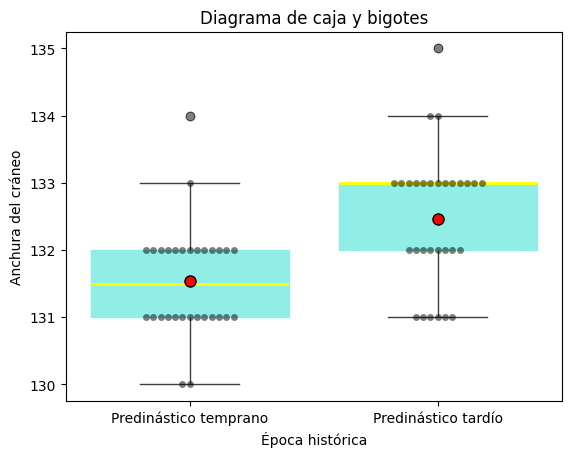

In [10]:
sns.boxplot(x='Época histórica', y='Anchura del cráneo', data=df,
            boxprops={'color': '#90eee7'}, 
            showmeans=True,
            meanprops={"marker":"o", "markerfacecolor":"red", "markeredgecolor":"black", "markersize":"8"},
            medianprops={'color': 'yellow', 'linewidth': 2})
sns.swarmplot(x='Época histórica', y='Anchura del cráneo', data=df, color='black', alpha=0.5)
plt.title('Diagrama de caja y bigotes')
plt.xticks(ticks=[0,1], labels=["Predinástico temprano", "Predinástico tardío"])
plt.show()

En el diagrama de caja y bigotes he decidido añadir el valor de la media, únicamente para ilustrar donde se situaría. Sé que está mal poner la media ya que no es un estadístico robusto y no da información relevante, pero creo que puede ser una ayuda.

## b. Determinar si las dos clases de muestras siguen una distribución normal mediante el test Kolmogorov-Smirnov.

Usaremos la corrección Lilliefords ya que no sabemos exactamente los parametros de la distribución normal de referencia, es por ello que usaremos los valores estimados en las muestras. 
* $\mu \to \bar{x}$
* $\sigma^2 \to \hat{s}^2$


Nuestro contraste de Kolmogorov-Smirnov-Lilliefords tiene en cuenta una de las dos posibles hipotésis:
* $H_0$: La muestra proviene de un modelo continuo F(x), el cual sigue una distribución normal.
* $H_1$: La muestra no proviene de una distrución F(x).

Para realizar este contraste compararemos la distribución teórica F(x), con la empírica $F_n(x)$.
$$
F_n(x)=
\begin{cases}
    0,\quad si\quad x<x_{(1)}\\
    \frac{r}{n},\quad si\quad x_{(r)}<=x<x_{(r+1)}\\
    1,\quad si\quad x>=x_{(n)}
\end{cases}
$$


In [11]:
def Fn(muestra):
    datos = sorted(muestra)
    r = len(set(muestra))
    n = len(muestra)
    sol = []
    valor = 0
    for i in range(n):
        if i == 0:
            valor += 1 
            sol.appned(valor/r)
        elif datos[i] == datos[n-1]:
            sol.append(1)
        elif datos[i] == datos[i-1]:
            sol.append(sol[-1])
        elif datos[i] > datos[i-1]:
            valor += 1 
            sol.append(valor/r)
    return sol

[0.03333333 0.06666667 0.1        0.13333333 0.16666667 0.2
 0.23333333 0.26666667 0.3        0.33333333 0.36666667 0.4
 0.43333333 0.46666667 0.5        0.53333333 0.56666667 0.6
 0.63333333 0.66666667 0.7        0.73333333 0.76666667 0.8
 0.83333333 0.86666667 0.9        0.93333333 0.96666667 1.        ]
[0.03333333 0.1        0.13333333 0.16666667 0.2        0.26666667
 0.33333333 0.36666667 0.43333333 0.5        0.56666667 0.6
 0.66666667 0.76666667 0.8        0.83333333 0.9        0.93333333
 0.96666667]


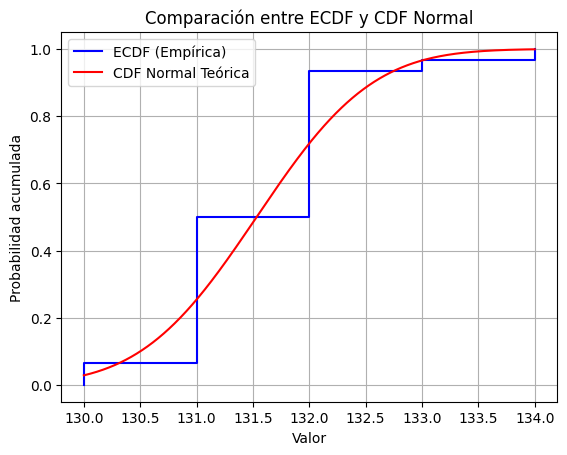

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statsmodels.api as sm

# Lista de datos de ejemplo
data = tempr

# 1. Calcular la ECDF (empirical cumulative distribution function)
ecdf = sm.distributions.ECDF(data)

# 2. Crear la CDF teórica de una distribución normal
x = np.linspace(min(data), max(data), 1000)  # Puntos en el rango de los datos
mean, std = np.mean(data), np.std(data)  # Media y desviación estándar de los datos
cdf_normal = norm.cdf(x, loc=mean, scale=std)  # CDF normal teórica

data_unique = sorted(set(data))

# Calcular frecuencias acumuladas
ecdf_y = np.arange(1, len(data) + 1) / len(data)
print(ecdf_y)
indices_cambio = [i for i in range(1, len(data)) if data[i] != data[i-1]]
indices_cambio = np.array(indices_cambio)-1
ecdf_y = ecdf_y[ indices_cambio]
print(ecdf_y)

# Graficar ECDF (pasos)
plt.step(ecdf.x, ecdf.y, where='post', label="ECDF (Empírica)", color='blue')
# Graficar CDF normal teórica
plt.plot(x, cdf_normal, label="CDF Normal Teórica", color='red')

# Configuración de la gráfica
plt.xlabel('Valor')
plt.ylabel('Probabilidad acumulada')
plt.title('Comparación entre ECDF y CDF Normal')
plt.legend()
plt.grid()
plt.show()


Realizaremos el calculo del valor critico, no usaremos tablas ya que la librería *scipy* tiene implementada la función normal.

In [13]:
alfa = 0.05
valor_critico_norm = scipy.stats.norm.ppf(1-alfa/2)
valor_critico_t = scipy.stats.t.ppf(1-alfa/2, df=len(tempr)-1)
valor_critico_ksl = lilliefors()

valor_critico_norm, valor_critico_t

TypeError: kstest_fit() missing 1 required positional argument: 'x'

In [128]:
# Usando la libreria de sklearn
def estandarizador(datos):
    estandar = sklearn.preprocessing.StandardScaler()
    return estandar.fit_transform(datos)

stand_tempr = estandarizador(tempr_arr.reshape(-1,1)).flatten()
stand_tard = estandarizador(tard_arr.reshape(-1,1)).flatten()
# pd.DataFrame({"Predinastico temprano": stand_tempr, "Predinastico tardio": stand_tard})

In [129]:
# Creandola yo
def estandarizador_1(datos, media, desviacion):
    estandar = (datos-media)/desviacion
    return estandar

stand_tempr_1 = estandarizador_1(tempr_arr, media_tempr, desv_tempr)
stand_tard_1 = estandarizador_1(tard_arr, media_tard, desv_tard)
# pd.DataFrame({"Predinastico temprano": stand_tempr_1, "Predinastico tardio": stand_tard_1})

In [130]:
df2 = multiIndex_df([stand_tempr, stand_tempr_1, stand_tard, stand_tard_1])
df2

Predinástico temprano                   Predinástico tardío               
   Funciones de librerias Cálculo a mano Funciones de librerias Cálculo a mano
0                1.820733       1.790130              -0.470871      -0.462957
1               -0.662085      -0.650956               0.538138       0.529093
2               -0.662085      -0.650956              -1.479880      -1.455006
3                0.579324       0.569587               0.538138       0.529093
4                3.062142       3.010674               0.538138       0.529093
5               -0.662085      -0.650956               0.538138       0.529093
6                0.579324       0.569587               1.547147       1.521143
7                0.579324       0.569587              -0.470871      -0.462957
8               -0.662085      -0.650956              -1.479880      -1.455006
9               -0.662085      -0.650956               0.538138       0.529093
10               0.579324       0.569587               0.538138       0.529093
11              -0.662085      -0.650956               0.538138       0.529093
12              -0.662085      -0.650956              -0.470871      -0.462957
13               0.579324       0.569587               0.538138       0.529093
14               0.579324       0.569587               0.538138       0.529093
15              -0.662085      -0.650956               0.538138       0.529093
16              -0.662085      -0.650956               0.538138       0.529093
17               0.579324       0.569587              -1.479880      -1.455006
18              -0.662085      -0.650956               2.556157       2.513193
19              -0.662085      -0.650956              -1.479880      -1.455006
20               0.579324       0.569587               0.538138       0.529093
21               0.579324       0.569587              -0.470871      -0.462957
22               0.579324       0.569587              -0.470871      -0.462957
23              -0.662085      -0.650956              -0.470871      -0.462957
24              -1.903494      -1.871500              -1.479880      -1.455006
25               0.579324       0.569587               1.547147       1.521143
26               0.579324       0.569587              -1.479880      -1.455006
27              -0.662085      -0.650956               0.538138       0.529093
28               0.579324       0.569587              -0.470871      -0.462957
29              -1.903494      -1.871500              -0.470871      -0.462957

Bueno ahora vamos a realizar la combrobación de si ambas muestras provienen de una distribución normal o no.

In [131]:
statistic_tempr, pvalue_tempr = scipy.stats.ks_1samp(stand_tempr, scipy.stats.norm.cdf)
statistic_tard, pvalue_tard = scipy.stats.ks_1samp(stand_tard, scipy.stats.norm.cdf)

df3 = pd.DataFrame([[statistic_tempr, statistic_tard], [pvalue_tempr, pvalue_tard]], 
                   columns=columnas_predinastico,
                   index=["Estadistico",
                           "p value"])
df3

,Predinástico temprano,Predinástico tardío
Estadistico,0.246042,0.238093
p value,0.043795,0.055727


Con un p value menor a un umbral del 5% podemos rechazar la hípotesis nula. Esto quiere decir que estos datos son bastante incompatibles(pero no al 100%) con la distribucion normal. Pero al tratar con una muestra de la población de 30 registros por cada poblacion, es posible dar con un error del tipo 2, donde se concluye que no es real 


In [132]:
bootstrap = sklearn.utils.resample(tard_arr, n_samples=2000)
print(bootstrap, len(bootstrap))

[134 133 132 ... 132 133 131] 2000


In [133]:
def F(muestra):
    muestra_1 = muestra.copy()
    muestra_1.sort()
    valores_diferentes = set(muestra_1)
    k = 
    sol = []
    index = 0
    for x in muestra_1:
        if x == muestra_1[-1]:
            sol.append(1)
        elif x>= muestra_1[index-1]
        index += 1
    return []

SyntaxError: invalid syntax (416770678.py, line 5)

In [108]:
def comparacion_con_normal(datos):
    bootstrap = sklearn.utils.resample(datos, n_samples=2000)
    media = np.mean(datos)
    desviacion = np.std(datos)
    print(media, desviacion)
    norm_x = np.linspace(-5, 5, 1000)
    norm_y = scipy.stats.norm.pdf(norm_x, media, desviacion)
    plt.hist(bootstrap, bins=2000, density=True,  color='g', label='Datos')
    plt.plot(norm_x, norm_y)
    plt.title("Comparación entre los Datos y la Distribución Normal")
    plt.xlabel("Valor")
    plt.ylabel("Densidad de Probabilidad")
    plt.legend()

    # Mostrar la gráfica
    plt.show()


2.3536728122053318e-15 1.0


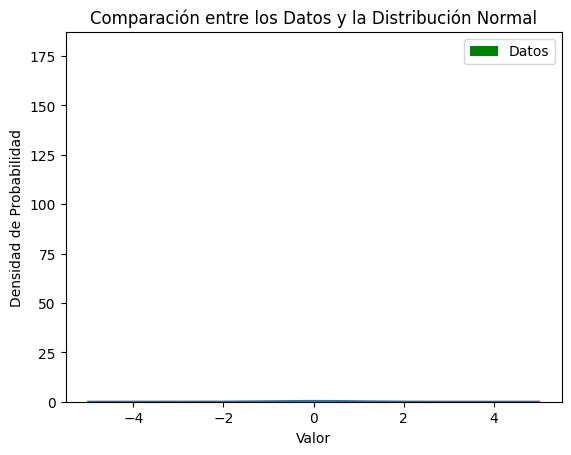

In [ ]:
comparacion_con_normal(stand_tempr)

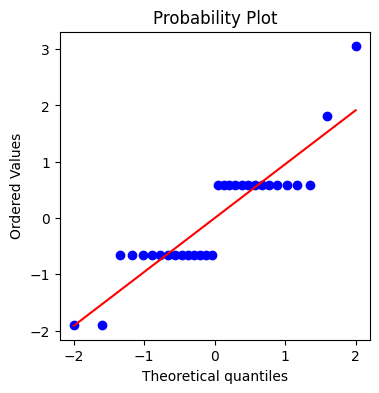

In [ ]:
def diagrama_QQ(datos):
    media = np.mean(datos)
    desviacion = np.std(datos)

    norm_x = np.linspace(-5, 5, 1000)
    norm_y = scipy.stats.norm.pdf(norm_x, media, desviacion)

    fig, ax = plt.subplots(figsize=(4,4))
    scipy.stats.probplot(datos, plot=ax)

diagrama_QQ(stand_tempr)
    